In [ ]:
import warnings
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# with warnings.catch_warnings():
#     # You should probably not use this dataset.
#     warnings.filterwarnings("ignore")
#     X, y = load_boston(return_X_y=True)
    
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()

In [74]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle


def load_ames_housing():
    df = fetch_openml(name="house_prices", as_frame=True)
    X = df.data
    y = df.target

    features = ['YrSold', 'HeatingQC', 'Street', 'YearRemodAdd', 'Heating',
                'MasVnrType', 'BsmtUnfSF', 'Foundation', 'MasVnrArea',
                'MSSubClass', 'ExterQual', 'Condition2', 'GarageCars',
                'GarageType', 'OverallQual', 'TotalBsmtSF', 'BsmtFinSF1',
                'HouseStyle', 'MiscFeature', 'MoSold']

    X = X[features]
    X, y = shuffle(X, y, random_state=0)
    col=features
    col.append('target')
    housing=pd.DataFrame(np.c_[X, y], columns=col)
#     X = X[:600]
#     y = y[:600]

    return X, np.log(y), housing


X, y , housing= load_ames_housing()
housing


,YrSold,HeatingQC,Street,YearRemodAdd,Heating,MasVnrType,BsmtUnfSF,Foundation,MasVnrArea,MSSubClass,...,Condition2,GarageCars,GarageType,OverallQual,TotalBsmtSF,BsmtFinSF1,HouseStyle,MiscFeature,MoSold,target
0,2007.0,TA,Pave,1975.0,GasA,None,816.0,PConc,NaN,20.0,...,Norm,2.0,Attchd,6.0,2035.0,1219.0,1Story,None,3.0,200624.0
1,2006.0,TA,Pave,1950.0,GasA,None,238.0,CBlock,0.0,50.0,...,Norm,1.0,Attchd,6.0,806.0,403.0,1.5Fin,None,8.0,133000.0
2,2009.0,TA,Pave,1950.0,GasA,BrkCmn,524.0,CBlock,161.0,50.0,...,Norm,1.0,Detchd,5.0,709.0,185.0,1.5Fin,None,7.0,110000.0
3,2008.0,Ex,Pave,1977.0,GasA,BrkFace,768.0,CBlock,299.0,60.0,...,Norm,2.0,Attchd,7.0,1160.0,392.0,2Story,None,3.0,192000.0
4,2010.0,TA,Pave,1971.0,GasA,BrkFace,525.0,CBlock,381.0,160.0,...,Norm,1.0,Detchd,6.0,525.0,0.0,2Story,None,3.0,88000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2009.0,Ex,Pave,1999.0,GasA,BrkFace,89.0,PConc,673.0,60.0,...,Norm,3.0,Attchd,8.0,1252.0,1163.0,2Story,None,7.0,337000.0
1456,2010.0,TA,Pave,1995.0,GasA,None,625.0,CBlock,0.0,20.0,...,Norm,2.0,Attchd,4.0,1067.0,442.0,1Story,None,2.0,128000.0
1457,2010.0,TA,Pave,1978.0,GasA,None,0.0,Slab,0.0,90.0,...,Norm,2.0,Attchd,6.0,0.0,0.0,1.5Fin,None,4.0,112000.0
1458,2006.0,Ex,Pave,2004.0,GasA,BrkFace,1374.0,PConc,18.0,120.0,...,Norm,2.0,Attchd,7.0,1374.0,0.0,1Story,None,10.0,234000.0


In [63]:
# housing.columns= housing.columns.str.lower()
# housing

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YrSold        1460 non-null   object
 1   HeatingQC     1460 non-null   object
 2   Street        1460 non-null   object
 3   YearRemodAdd  1460 non-null   object
 4   Heating       1460 non-null   object
 5   MasVnrType    1452 non-null   object
 6   BsmtUnfSF     1460 non-null   object
 7   Foundation    1460 non-null   object
 8   MasVnrArea    1452 non-null   object
 9   MSSubClass    1460 non-null   object
 10  ExterQual     1460 non-null   object
 11  Condition2    1460 non-null   object
 12  GarageCars    1460 non-null   object
 13  GarageType    1379 non-null   object
 14  OverallQual   1460 non-null   object
 15  TotalBsmtSF   1460 non-null   object
 16  BsmtFinSF1    1460 non-null   object
 17  HouseStyle    1460 non-null   object
 18  MiscFeature   54 non-null     object
 19  MoSold

In [76]:
from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
print(cat_selector(X))
print(X.info())


['HeatingQC', 'Street', 'Heating', 'MasVnrType', 'Foundation', 'ExterQual', 'Condition2', 'GarageType', 'HouseStyle', 'MiscFeature']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 529 to 684
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YrSold        1460 non-null   float64
 1   HeatingQC     1460 non-null   object 
 2   Street        1460 non-null   object 
 3   YearRemodAdd  1460 non-null   float64
 4   Heating       1460 non-null   object 
 5   MasVnrType    1452 non-null   object 
 6   BsmtUnfSF     1460 non-null   float64
 7   Foundation    1460 non-null   object 
 8   MasVnrArea    1452 non-null   float64
 9   MSSubClass    1460 non-null   float64
 10  ExterQual     1460 non-null   object 
 11  Condition2    1460 non-null   object 
 12  GarageCars    1460 non-null   float64
 13  GarageType    1379 non-null   object 
 14  OverallQual   1460 non-null   float64
 15  TotalBsmtSF   1460 non-

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

cat_tree_processor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector))


In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True))

linear_preprocessor = make_column_transformer((num_linear_processor, num_selector), (cat_linear_processor, cat_selector))


In [86]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(
    tree_preprocessor, RandomForestRegressor(random_state=42))


In [83]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(random_state=0))


In [84]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [('Random Forest', rf_pipeline),
              ('Lasso', lasso_pipeline),
              ('Gradient Boosting', gbdt_pipeline)]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

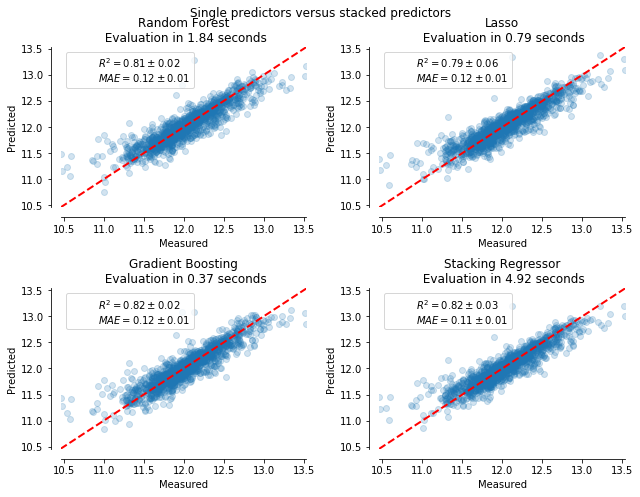

In [85]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [101]:
rf_pipeline.fit(pd.DataFrame(X_train),pd.DataFrame(y_train))
y_test_pred=rf_pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_mae = mean_absolute_error(y_test, y_test_pred)
print(rf_mae)

rf_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(rf_rmse)

2.0395392156862746
2.8109631609391226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
